2022-03-01 <br/>
Alternative Fuel Stations <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-03-01/readme.md

Plotting multiple geographic scatter map by category - Completed <br/>
Interactive Dropdown - Completed <br/>

https://towardsdatascience.com/how-to-create-interactive-map-plots-with-plotly-7b57e889239a

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-01/stations.csv')

d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning:

Columns (9,18,19,23,34,36,37,46,49,52,55,56,60,61,62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df.head()

X          Y  OBJECTID FUEL_TYPE_CODE  \
0 -86.267021  32.367916         1            CNG   
1 -84.398837  33.745843         2            CNG   
2 -84.367461  33.821911         3            CNG   
3 -84.543822  33.760256         4            CNG   
4 -95.435385  29.779918         5            CNG   

                                        STATION_NAME        STREET_ADDRESS  \
0               Spire - Montgomery Operations Center      2951 Chestnut St   
1                                PS Energy - Atlanta      340 Whitehall St   
2       Metropolitan Atlanta Rapid Transit Authority   2424 Piedmont Rd NE   
3                              United Parcel Service  270 Marvin Miller Dr   
4  Clean Energy - Texas Department of Transportation   7721A Washington St   

                             INTERSECTION_DIRECTIONS        CITY STATE    ZIP  \
0                                                NaN  Montgomery    AL  36107   
1  From I-7585 N, exit 91 to Central Ave, left on...     Atlanta    GA  30303   
2                                                NaN     Atlanta    GA  30324   
3                                                NaN     Atlanta    GA  30336   
4  I-10, Washington Ave exit, 1.5 blocks to the s...     Houston    TX  77007   

   ...  HYDROGEN_PRESSURES HYDROGEN_STANDARDS CNG_FILL_TYPE_CODE    CNG_PSI  \
0  ...                 NaN                NaN                  B       3600   
1  ...                 NaN                NaN                  Q       3600   
2  ...                 NaN                NaN                  Q       3000   
3  ...                 NaN                NaN                  B       3600   
4  ...                 NaN                NaN                  Q  3000 3600   

  CNG_VEHICLE_CLASS LNG_VEHICLE_CLASS EV_ON_SITE_RENEWABLE_SOURCE  \
0                MD               NaN                         NaN   
1                MD               NaN                         NaN   
2                LD               NaN                         NaN   
3                HD               NaN                         NaN   
4                MD               NaN                         NaN   

  RESTRICTED_ACCESS      LATDD     LONGDD  
0               NaN  32.367916 -86.267021  
1               NaN  33.745843 -84.398837  
2               NaN  33.821911 -84.367461  
3               NaN  33.760256 -84.543822  
4               NaN  29.779918 -95.435385  

[5 rows x 70 columns]

In [4]:
fuel_types = list(df['FUEL_TYPE_CODE'].value_counts().index)
fuel_types

['ELEC', 'E85', 'LPG', 'CNG', 'BD', 'LNG', 'HY']

In [7]:
figure = dict(data = data, layout = layout)

In [27]:
fuel_types

['ELEC', 'E85', 'LPG', 'CNG', 'BD', 'LNG', 'HY']

In [20]:
# Individual category layout 
fig = go.Figure() 
fig.add_trace(go.Scattergeo( lat = df.loc[df['FUEL_TYPE_CODE'] == "E85",'LATDD'],
    lon = df.loc[df['FUEL_TYPE_CODE'] == "E85",'LONGDD'],
    name = "E85",
    marker = dict(size = 8, opacity = 0.5)
            #,marker_color = df['FUEL_TYPE_CODE'] 
            ))

fig.update_geos(
    visible=False, resolution=50, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

fig.show()

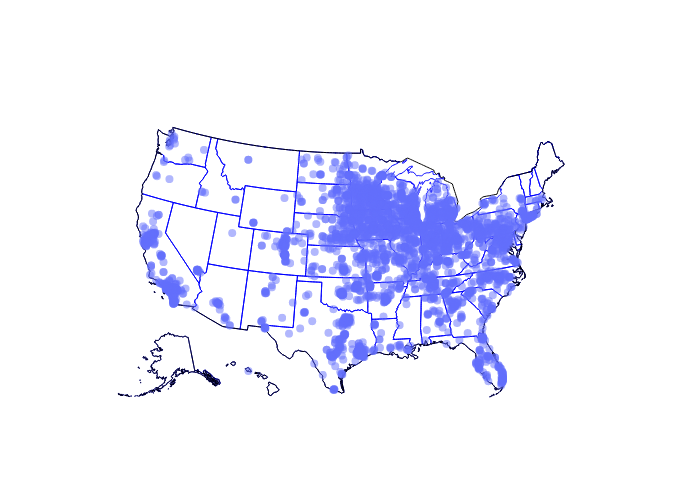

In [21]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [22]:
# Plotting by group 
fig = go.Figure() 
for event in fuel_types:
    fig.add_trace(go.Scattergeo( lat = df.loc[df['FUEL_TYPE_CODE'] == event,'LATDD'],
    lon = df.loc[df['FUEL_TYPE_CODE'] == event,'LONGDD'],
    name = event,
    marker = dict(size = 8, opacity = 0.5)
            #,marker_color = df['FUEL_TYPE_CODE'] 
            ))
annotations = [dict(text='How dense is each Fuel Across the USA', 
         font=dict(color='#FFFFFF',size=14), borderpad=10, 
         x=0.05, y=0.05, xref='paper', yref='paper', align='left', showarrow=False, bgcolor='black')]


fig.show()

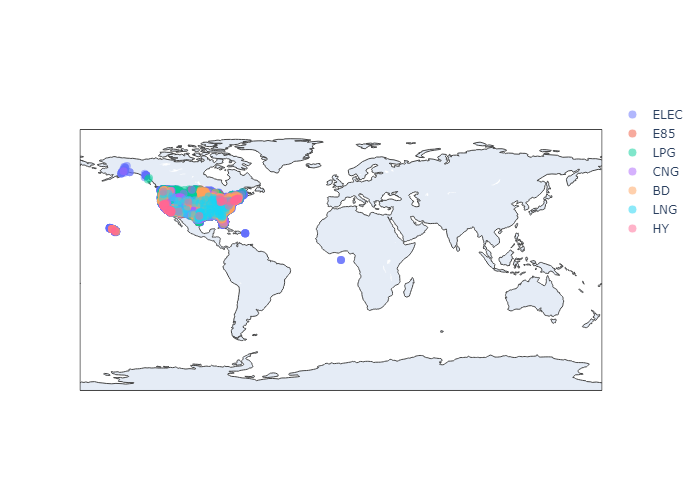

In [23]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [18]:
# Adding the interactive features 


fig = go.Figure() 


for event in fuel_types:
    fig.add_trace(go.Scattergeo( lat = df.loc[df['FUEL_TYPE_CODE'] == event,'LATDD'],
    lon = df.loc[df['FUEL_TYPE_CODE'] == event,'LONGDD'],
    name = event,
    marker = dict(size = 8, opacity = 0.5)
            #,marker_color = df['FUEL_TYPE_CODE'] 
            ))

            

fig.update_layout(
    height = 800,
    margin = dict(t=0, b=0, l=0, r=0),
    font = dict(color='#FFFFFF', size=11),
    paper_bgcolor = '#000000',
    mapbox=dict(
     #   accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='dark'
    ),
)

fig.update_geos(
    visible=False, resolution=50, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

fig.update_layout(

    updatemenus=list([

    dict(
        buttons=list([
            dict(
                args=['mapbox.style', 'dark'],
                label='Dark',
                method='relayout'
            ),                    
            dict(
                args=['mapbox.style', 'light'],
                label='Light',
                method='relayout'
            ),
            dict(
                args=['mapbox.style', 'outdoors'],
                label='Outdoors',
                method='relayout'
            ),
            dict(
                args=['mapbox.style', 'satellite-streets'],
                label='Satellite with Streets',
                method='relayout'
            )                    
        ]),
        direction = 'up',
        x = 0.75,
        xanchor = 'left',
        y = 0.05,
        yanchor = 'bottom',
        bgcolor = '#000000',
        bordercolor = '#FFFFFF',
        font = dict(size=11)
    ),    
    # ['ELEC', 'E85', 'LPG', 'CNG', 'BD', 'LNG', 'HY']
    dict(
         buttons=list([
            dict(label = 'All Fuel Types',
                 method = 'update',
                 args = [{'visible': [True, True, True, True, True, True, True]}]),
            dict(label = 'ELEC',
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False, False, False]}]),
            dict(label = 'E85',
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False, False, False]}]),
             dict(label = 'LPG',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False, False, False]}]),
             dict(label = 'CNG',
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False, False, False]}]),
             dict(label = 'BD',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, False, False]}]),
             dict(label = 'LNG',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, True, False]}]),
             dict(label = 'HY',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True]}])
          
        ]),
        direction = 'down',
        x = 0.01,
        xanchor = 'left',
        y = 0.99,
        yanchor = 'bottom',
        bgcolor = '#000000',
        bordercolor = '#FFFFFF',
        font = dict(size=11)
    )
]),
    annotations = [dict(text='How dense is each Fuel Type Across the USA', 
         font=dict(color='#FFFFFF',size=14), borderpad=10, 
         x=0.05, y=0.05, xref='paper', yref='paper', align='left', showarrow=False, bgcolor='black')] ,

    title = "Distribuion of Fuel Across  USA"

)



fig.show()

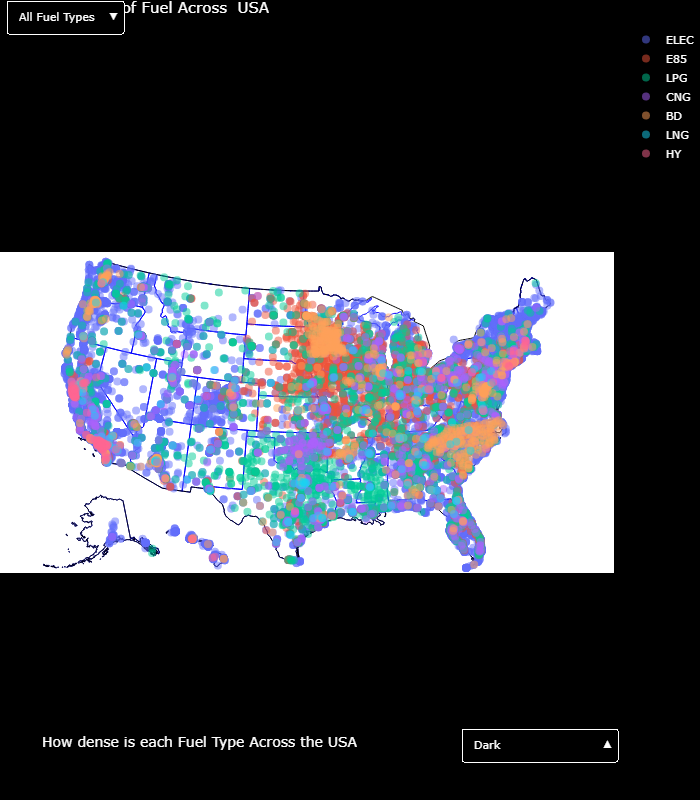

In [19]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)
